In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import sys

sys.path.append('/Users/thor/surfdrive/Projects/pymdna/studies/1_protein-dna_filament/')
# from numpy import dot
from filament import *
from voxelizer import *

# # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 

%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


In [2]:
traj = md.load('./pdbs/0_dimer_1_2.pdb')
xyz = traj.xyz[0]

Get points based on COM of QGR motif

In [ ]:
def get_COM_selections(traj, QGR_resids):
    coms = []
    for ids in QGR_resids:
        selection = traj.top.select(f'resid {ids[0]} {ids[1]} {ids[2]}')
        com = md.compute_center_of_mass(traj.atom_slice(selection))
        coms.append(com)
    return np.array([list(l) for l in list(np.array(coms).swapaxes(0,1)[0])])



atom_indices = traj.top.select('resSeq 111 112 113')
QGR = []
for index in atom_indices:
    at = traj.top.atom(index)
    res = at.residue
    QGR.append(res.index)

QGR = np.unique(QGR)
QGR_chunks = np.array([QGR[i:i + 3] for i in range(0, len(QGR), 3)])
print(QGR_chunks )
# QGR_chunks = np.delete(QGR_chunks, 1, 0)
points  = get_COM_selections(traj, QGR_chunks)


Get start and end based on DNA ends

In [3]:
path_goals = []
DNA_residue_names = ['DG','DC','DT','DA']
DNA_chainids = []
for chain in traj.top.chains:
    print(chain._residues)
    for res in chain._residues:
         if str(res.name) in DNA_residue_names:
            DNA_chainids.append(res.chain.index)
DNA_chainids = np.unique(DNA_chainids)
DNA_chainids = np.array([DNA_chainids[i:i + 2] for i in range(0, len(DNA_chainids), 2)])

COM_primes = []
for chainids in DNA_chainids:
    nuc = mdna.NucleicFrames(traj, chainids=chainids)
    frames = nuc.mean_reference_frames
    print(frames.shape)
    five_prime = frames[0][0]
    three_prime = frames[-1][0]
    COM_primes.append(five_prime[0])
    COM_primes.append(three_prime[0])

COM_primes = np.array(COM_primes)
# remove the first and last points
points = COM_primes[1:-1]


[MET1, SER2, GLU3, ALA4, LEU5, LYS6, ILE7, LEU8, ASN9, ASN10, ILE11, ARG12, THR13, LEU14, ARG15, ALA16, GLN17, ALA18, ARG19, GLU20, CYS21, THR22, LEU23, GLU24, THR25, LEU26, GLU27, GLU28, MET29, LEU30, GLU31, LYS32, LEU33, GLU34, VAL35, VAL36, VAL37, ASN38, GLU39, ARG40, ARG41, GLU42, GLU43, GLU44, SER45, ALA46, ALA47, ALA48, ALA49, GLU50, VAL51, GLU52, GLU53, ARG54, THR55, ARG56, LYS57, LEU58, GLN59, GLN60, TYR61, ARG62, GLU63, MET64, LEU65, ILE66, ALA67, ASP68, GLY69, ILE70, ASP71, PRO72, ASN73, GLU74, LEU75, LEU76, ASN77, SER78, LEU79, ALA80, ALA81, VAL82, LYS83, SER84, GLY85, THR86, LYS87, ALA88, LYS89, ARG90, ALA91, GLN92, ARG93, PRO94, ALA95, LYS96, TYR97, SER98, TYR99, VAL100, ASP101, GLU102, ASN103, GLY104, GLU105, THR106, LYS107, THR108, TRP109, THR110, GLY111, GLN112, GLY113, ARG114, THR115, PRO116, ALA117, VAL118, ILE119, LYS120, LYS121, ALA122, MET123, ASP124, GLU125, GLN126, GLY127, LYS128, SER129, LEU130, ASP131, ASP132, PHE133, LEU134, ILE135, LYS136, GLN137]
[MET1, SER2

Point [28 22 34] is inside voxel space. Moving to nearest zero voxel.
Point [28 22 34], 45714 is nearest zero voxel (27, 22, 34), 44114
Point [ 0 22  8] is inside voxel space. Moving to nearest zero voxel.
Point [ 0 22  8], 888 is nearest zero voxel (0, 21, 7), 847


array([[-2.128229  , 12.391914  , -2.342231  ],
       [-2.128229  , 12.0309725 , -2.342231  ],
       [-2.128229  , 12.0309725 , -1.9812886 ],
       [-2.128229  , 12.0309725 , -1.6203461 ],
       [-2.128229  , 12.0309725 , -1.2594035 ],
       [-2.128229  , 12.391914  , -1.2594035 ],
       [-2.128229  , 12.391914  , -0.89846104],
       [-2.128229  , 12.752857  , -0.89846104],
       [-2.128229  , 12.752857  , -0.5375185 ],
       [-1.7672863 , 12.752857  , -0.5375185 ],
       [-1.4063438 , 12.752857  , -0.5375185 ],
       [-1.0454013 , 12.752857  , -0.5375185 ],
       [-0.68445885, 12.752857  , -0.5375185 ],
       [-0.32351637, 12.752857  , -0.5375185 ],
       [-0.32351637, 12.752857  , -0.17657603],
       [ 0.03742613, 12.752857  , -0.17657603],
       [ 0.03742613, 12.752857  ,  0.18436646],
       [ 0.39836863, 12.752857  ,  0.18436646],
       [ 0.39836863, 12.752857  ,  0.54530895],
       [ 0.75931114, 12.752857  ,  0.54530895],
       [ 0.75931114, 12.752857  ,  0.906

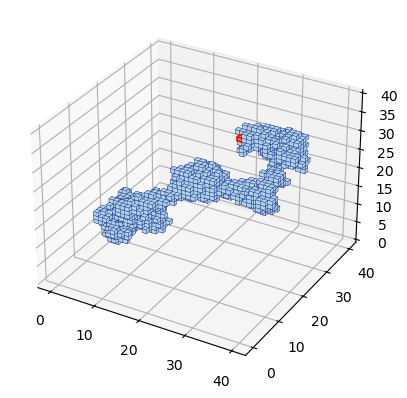

In [4]:
V = Voxelizer(xyz,n=40)
V.process_points(points=points)
V.plot(control_points=True)

path = V.find_path(ordered=True)
xyz_path = V.voxel_to_xyz(path)
xyz_path = np.array(xyz_path)
xyz_path

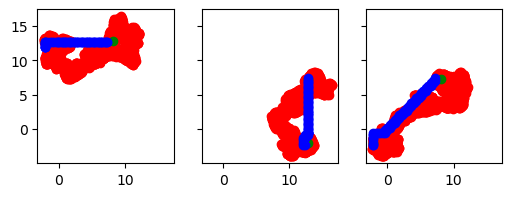

In [5]:
# plot xyz in 3D
fig, ax = plt.subplots(1,3,figsize=[6,2],sharex=True,sharey=True)
ax[0].scatter(xyz[:,0], xyz[:,1], c='r', marker='o')
ax[0].plot(xyz_path[:,0], xyz_path[:,1],c='b', marker='o')
ax[0].scatter(points[:,0], points[:,1], c='g', marker='o')

ax[1].scatter(xyz[:,1], xyz[:,2], c='r', marker='o')
ax[1].plot(xyz_path[:,1], xyz_path[:,2],c='b', marker='o')
ax[1].scatter(points[:,1], points[:,2], c='g', marker='o')

ax[2].scatter(xyz[:,0], xyz[:,2], c='r', marker='o')
ax[2].plot(xyz_path[:,0], xyz_path[:,2],c='b', marker='o')
ax[2].scatter(points[:,0], points[:,2], c='g', marker='o')


# # plot xyz in 3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='r', marker='o')
# ax.plot(xyz_path[:,0], xyz_path[:,1], xyz_path[:,2], c='b', marker='o')
# ax.scatter(points[:,0], points[:,1], points[:,2], c='g', marker='o')

In [6]:
import numpy as np
from scipy.signal import savgol_filter

# Smooth path a bit 
path_xyz = V.voxel_to_xyz(path)
smooth_path_xyz = savgol_filter(path_xyz, window_length=20, polyorder=3, axis=0)

# Convert the control points to a spline
spline = mdna.SplineFrames(smooth_path_xyz)

# Generate the DNA structure
generator = mdna.StructureGenerator(sequence=None,spline=spline)
dna = generator.get_traj()

mix = traj.stack(dna)
mix.save('0_mix.pdb')

AGGCTGGGCTCAACTAGTTGAGCTTTCTCCCCATAGTTCGGAGA


In [5]:
import openmm as mm
import openmm.app as app
import openmm.unit as unit
from mdtraj.reporters import HDF5Reporter

pdb = mix

In [10]:
time = 1 * unit.picoseconds
time_step = 2 * unit.femtoseconds
temperature = 310 * unit.kelvin
steps = int(time/time_step)
steps = 101

name = 'mix'
topology = pdb.topology.to_openmm()
modeller = app.Modeller(topology, pdb.xyz[0])

forcefield = app.ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')
modeller.addHydrogens(forcefield)
#modeller.addSolvent(forcefield, padding=1.0*unit.nanometers)

system = forcefield.createSystem(modeller.topology, nonbondedMethod=app.CutoffNonPeriodic)
integrator = mm.LangevinIntegrator(temperature, 1.0/unit.picoseconds, time_step)

simulation = app.Simulation(modeller.topology, system, integrator)
simulation.context.setPositions(modeller.positions)
simulation.reporters.append(HDF5Reporter(f'./{name}'+'.h5', 100))
simulation.reporters.append(app.StateDataReporter(f'./output_{name}.csv', 100, step=True, potentialEnergy=True, temperature=True,speed=True))
simulation.minimizeEnergy()
simulation.step(steps)

In [11]:
simulation.reporters[0].close()
traj = md.load(f'./{name}'+'.h5')

/Users/thor/opt/anaconda3/envs/mdna/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


In [13]:
traj[-1].save('mix_em.pdb')